In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('pffScoutingData.csv')
df.head()

,gameId,playId,nflId,pff_role,pff_positionLinedUp,pff_hit,pff_hurry,pff_sack,pff_beatenByDefender,pff_hitAllowed,pff_hurryAllowed,pff_sackAllowed,pff_nflIdBlockedPlayer,pff_blockType,pff_backFieldBlock
0,2021090900,97,25511,Pass,QB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021090900,97,35481,Pass Route,TE-L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021090900,97,35634,Pass Route,LWR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021090900,97,39985,Pass Route,HB-R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021090900,97,40151,Pass Block,C,NaN,NaN,NaN,0.0,0.0,0.0,0.0,44955.0,SW,0.0


In [5]:
df.nunique()

gameId                     122
playId                    3762
nflId                     1679
pff_role                     5
pff_positionLinedUp         56
pff_hit                      2
pff_hurry                    2
pff_sack                     2
pff_beatenByDefender         2
pff_hitAllowed               2
pff_hurryAllowed             2
pff_sackAllowed              2
pff_nflIdBlockedPlayer     665
pff_blockType               12
pff_backFieldBlock           2
dtype: int64

In [6]:
for col in df.columns:
    
    print(f'{df[col].nunique()}')

122
3762
1679
5
56
2
2
2
2
2
2
2
665
12
2


In [7]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
percent_missing

gameId                     0.000000
playId                     0.000000
nflId                      0.000000
pff_role                   0.000000
pff_positionLinedUp        0.000000
pff_hit                   50.000000
pff_hurry                 50.000000
pff_sack                  50.000000
pff_beatenByDefender      74.456320
pff_hitAllowed            74.456320
pff_hurryAllowed          74.456320
pff_sackAllowed           74.456320
pff_nflIdBlockedPlayer    75.285519
pff_blockType             74.553529
pff_backFieldBlock        74.554060
dtype: float64

In [8]:
df.shape

(188254, 15)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188254 entries, 0 to 188253
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   gameId                  188254 non-null  int64  
 1   playId                  188254 non-null  int64  
 2   nflId                   188254 non-null  int64  
 3   pff_role                188254 non-null  object 
 4   pff_positionLinedUp     188254 non-null  object 
 5   pff_hit                 94127 non-null   float64
 6   pff_hurry               94127 non-null   float64
 7   pff_sack                94127 non-null   float64
 8   pff_beatenByDefender    48087 non-null   float64
 9   pff_hitAllowed          48087 non-null   float64
 10  pff_hurryAllowed        48087 non-null   float64
 11  pff_sackAllowed         48087 non-null   float64
 12  pff_nflIdBlockedPlayer  46526 non-null   float64
 13  pff_blockType           47904 non-null   object 
 14  pff_backFieldBlock  

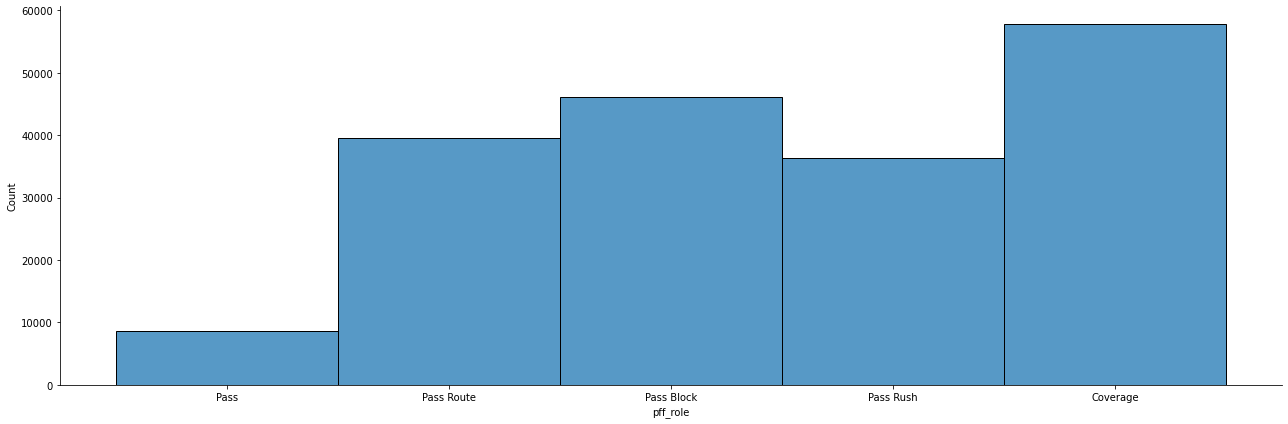

In [10]:
sns.displot(data=df,x='pff_role',height=6,aspect=3)
plt.show()

In [11]:
df_hit = df.loc[(df['pff_hit']== 0.)|(df['pff_hit']== 1.)]
df_hit.shape

(94127, 15)

In [12]:
df_hit.head()

,gameId,playId,nflId,pff_role,pff_positionLinedUp,pff_hit,pff_hurry,pff_sack,pff_beatenByDefender,pff_hitAllowed,pff_hurryAllowed,pff_sackAllowed,pff_nflIdBlockedPlayer,pff_blockType,pff_backFieldBlock
6,2021090900,97,41263,Pass Rush,LEO,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2021090900,97,42403,Pass Rush,ROLB,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,2021090900,97,43306,Coverage,ROLB,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,2021090900,97,43478,Coverage,RCB,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,2021090900,97,44904,Coverage,SCBR,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df['pff_hit'].unique()

array([nan,  0.,  1.])

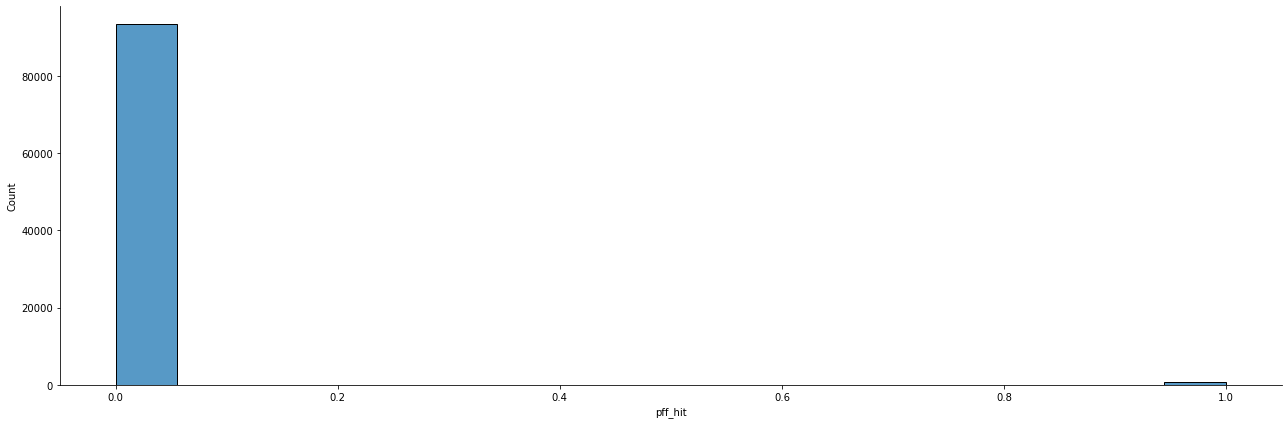

In [14]:
sns.displot(data=df_hit,x='pff_hit',height=6,aspect=3)
plt.show()

In [15]:
df.dtypes

gameId                      int64
playId                      int64
nflId                       int64
pff_role                   object
pff_positionLinedUp        object
pff_hit                   float64
pff_hurry                 float64
pff_sack                  float64
pff_beatenByDefender      float64
pff_hitAllowed            float64
pff_hurryAllowed          float64
pff_sackAllowed           float64
pff_nflIdBlockedPlayer    float64
pff_blockType              object
pff_backFieldBlock        float64
dtype: object

In [16]:
df.nunique()

gameId                     122
playId                    3762
nflId                     1679
pff_role                     5
pff_positionLinedUp         56
pff_hit                      2
pff_hurry                    2
pff_sack                     2
pff_beatenByDefender         2
pff_hitAllowed               2
pff_hurryAllowed             2
pff_sackAllowed              2
pff_nflIdBlockedPlayer     665
pff_blockType               12
pff_backFieldBlock           2
dtype: int64

In [17]:
for col in df.columns:
    if df[col].dtypes == 'float64':
        print(f'{col}-{df[col].unique()}')

pff_hit-[nan  0.  1.]
pff_hurry-[nan  1.  0.]
pff_sack-[nan  0.  1.]
pff_beatenByDefender-[nan  0.  1.]
pff_hitAllowed-[nan  0.  1.]
pff_hurryAllowed-[nan  0.  1.]
pff_sackAllowed-[nan  0.  1.]
pff_nflIdBlockedPlayer-[   nan 44955. 42403. 53441. 35454. 40074. 35441. 46081. 34777. 46132.
 41915. 42560. 38588. 53504. 41263. 41363. 46185. 53621. 44892. 53461.
 52587. 43323. 47788. 52453. 47882. 47890. 43757. 43306. 46219. 43378.
 35452. 44826. 38542. 43405. 37089. 46199. 53502. 42480. 40095. 46416.
 43361. 42346. 46127. 42497. 53611. 52455. 43341. 46269. 40039. 44893.
 52542. 53618. 37104. 44842. 52510. 35449. 42331. 53459. 47792. 44976.
 35470. 38548. 52640. 47975. 44886. 43319. 46165. 37841. 53674. 43638.
 52462. 43388. 46085. 45395. 40166. 40107. 52971. 52415. 41341. 47799.
 43791. 42368. 43301. 53053. 46204. 46249. 41243. 44825. 52446. 43308.
 47786. 44851. 53583. 52472. 53587. 46230. 46141. 48247. 46527. 53615.
 52592. 46205. 43407. 45042. 48364. 44915. 45226. 43455. 44877. 46146.
 5

In [18]:
df.head()

,gameId,playId,nflId,pff_role,pff_positionLinedUp,pff_hit,pff_hurry,pff_sack,pff_beatenByDefender,pff_hitAllowed,pff_hurryAllowed,pff_sackAllowed,pff_nflIdBlockedPlayer,pff_blockType,pff_backFieldBlock
0,2021090900,97,25511,Pass,QB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021090900,97,35481,Pass Route,TE-L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021090900,97,35634,Pass Route,LWR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021090900,97,39985,Pass Route,HB-R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021090900,97,40151,Pass Block,C,NaN,NaN,NaN,0.0,0.0,0.0,0.0,44955.0,SW,0.0


In [20]:
df['pff_blockType'].unique()

array([nan, 'SW', 'PP', 'PT', 'CL', 'PA', 'PU', 'CH', 'NB', 'BH', 'UP',
       'SR', 'PR'], dtype=object)

In [34]:
df_blocktype = df.loc[df['pff_blockType'].notnull()]

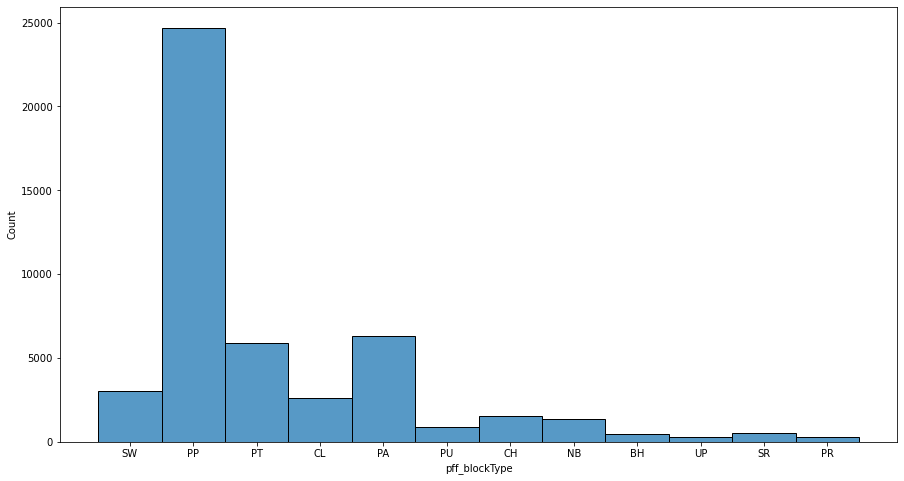

In [35]:
plt.figure(figsize = (15,8))
sns.histplot(df_blocktype['pff_blockType'])
plt.show()

In [36]:
df['pff_backFieldBlock'].unique()

array([nan,  0.,  1.])